In [1]:
# @title
import pandas as pd

data = pd.read_csv('https://1stdataset.s3.us-east-2.amazonaws.com/CSVs/CSV-03-11/03-11/UDPLag.csv')
data.head()

/tmp/ipykernel_8772/1089132998.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://1stdataset.s3.us-east-2.amazonaws.com/CSVs/CSV-03-11/03-11/UDPLag.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,50880,172.16.0.5-192.168.50.4-35468-49856-17,172.16.0.5,35468,192.168.50.4,49856,17,2018-11-03 11:01:43.652742,47,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP
1,83164,172.16.0.5-192.168.50.4-44167-44225-17,172.16.0.5,44167,192.168.50.4,44225,17,2018-11-03 11:01:43.653107,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP
2,49389,172.16.0.5-192.168.50.4-36215-28771-17,172.16.0.5,36215,192.168.50.4,28771,17,2018-11-03 11:01:43.653383,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP
3,34687,172.16.0.5-192.168.50.4-44168-43679-17,172.16.0.5,44168,192.168.50.4,43679,17,2018-11-03 11:01:43.653386,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP
4,87466,172.16.0.5-192.168.50.4-52334-44960-17,172.16.0.5,52334,192.168.50.4,44960,17,2018-11-03 11:01:43.653387,880701,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725165 entries, 0 to 725164
Data columns (total 88 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    725165 non-null  int64  
 1   Flow ID                       725165 non-null  object 
 2    Source IP                    725165 non-null  object 
 3    Source Port                  725165 non-null  int64  
 4    Destination IP               725165 non-null  object 
 5    Destination Port             725165 non-null  int64  
 6    Protocol                     725165 non-null  int64  
 7    Timestamp                    725165 non-null  object 
 8    Flow Duration                725165 non-null  int64  
 9    Total Fwd Packets            725165 non-null  int64  
 10   Total Backward Packets       725165 non-null  int64  
 11  Total Length of Fwd Packets   725165 non-null  float64
 12   Total Length of Bwd Packets  725165 non-nul

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from imblearn.over_sampling import SMOTE


# Pre-process the data
# Encode categorical features (e.g., IP addresses)
encoder = LabelEncoder()
data[' Source IP'] = encoder.fit_transform(data[' Source IP'])
data[' Destination IP'] = encoder.fit_transform(data[' Destination IP'])
data[' Timestamp'] = pd.to_datetime(data[' Timestamp']).astype(np.int64)
data[' Label'] = encoder.fit_transform(data[' Label'])
data.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,50880,172.16.0.5-192.168.50.4-35468-49856-17,38,35468,111,49856,17,1541242903652742000,47,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2
1,83164,172.16.0.5-192.168.50.4-44167-44225-17,38,44167,111,44225,17,1541242903653107000,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2
2,49389,172.16.0.5-192.168.50.4-36215-28771-17,38,36215,111,28771,17,1541242903653383000,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2
3,34687,172.16.0.5-192.168.50.4-44168-43679-17,38,44168,111,43679,17,1541242903653386000,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2
4,87466,172.16.0.5-192.168.50.4-52334-44960-17,38,52334,111,44960,17,1541242903653387000,880701,18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2


In [4]:
# Drop unnecessary columns in the CVs's
try:
  data = data.drop(['Unnamed: 0', 'Flow ID', 'SimillarHTTP'], axis=1)
except:
  print('Columns are dropped already')

# Set the desired number of majority class samples
num_majority_samples = 100000

# Get the minority class label
minority_class = data[' Label'].value_counts().idxmin()

# Separate majority and minority class samples
majority_samples = data[data[' Label'] != minority_class]
minority_samples = data[data[' Label'] == minority_class]

# Sample the majority class samples
majority_samples_sampled = majority_samples.sample(num_majority_samples, random_state=42)

# Combine the sampled majority class samples and minority class samples
balanced_data = pd.concat([majority_samples_sampled, minority_samples], axis=0)

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_data.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,38,47090,111,1553,17,1541242945131811000,212410,6,0,2088.0,...,0.00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,2
1,38,39710,111,35137,17,1541242913346293000,108937,4,0,1438.0,...,0.00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,2
2,38,10583,111,33595,6,1541244583300390000,100,2,2,12.0,...,0.00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,1
3,38,61417,111,2288,6,1541244564120132000,49,2,0,12.0,...,0.00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,1,1
4,38,34959,111,34959,6,1541244559236897000,64828462,12,2,72.0,...,26.75,51.5,104.0,1.0,12965670.8,2.287947e+06,14440461.0,9004726.0,1,1


In [5]:
balanced_data[' Label'].value_counts()

1    84026
2    15402
3     1873
0      572
Name:  Label, dtype: int64

In [6]:
data[' Label'].value_counts()

1    606749
2    112475
0      4068
3      1873
Name:  Label, dtype: int64

In [7]:
import pandas as pd

# Assuming your dataset is named 'data'
correlation = balanced_data[' Inbound'].corr(balanced_data[' Label'])
print("Correlation between 'Inbound' and 'Label':", correlation)


Correlation between 'Inbound' and 'Label': -0.1451403520824017


In [8]:
balanced_data[' Inbound'].value_counts()

1    100740
0      1133
Name:  Inbound, dtype: int64

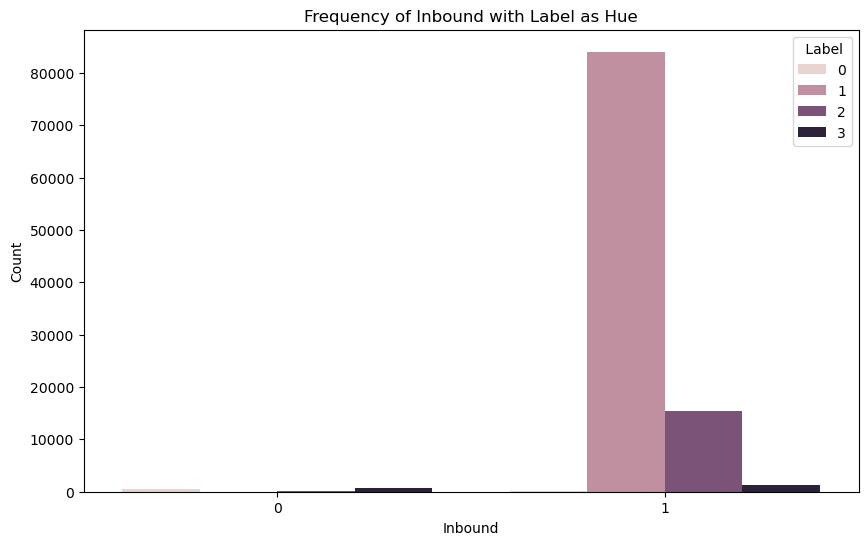

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_data, x=' Inbound', hue=' Label')
plt.title('Frequency of Inbound with Label as Hue')
plt.xlabel('Inbound')
plt.ylabel('Count')
plt.show()


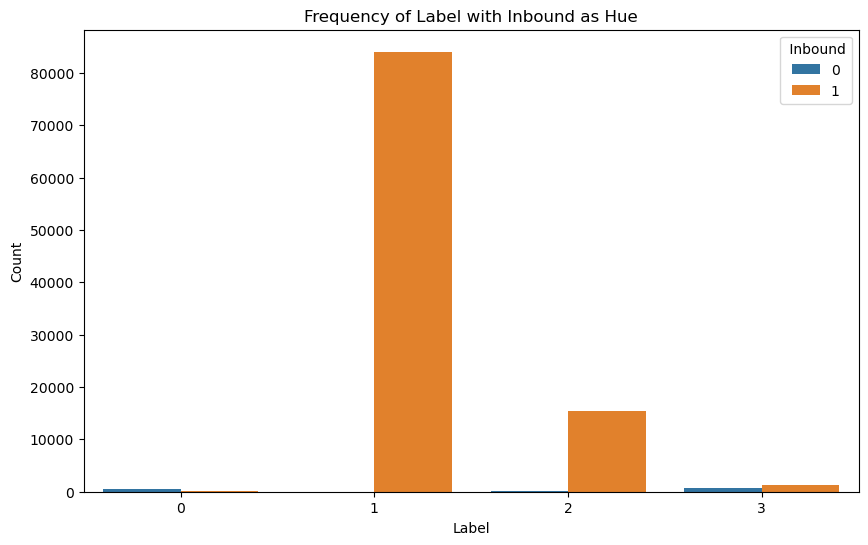

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_data, x=' Label', hue=' Inbound')
plt.title('Frequency of Label with Inbound as Hue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


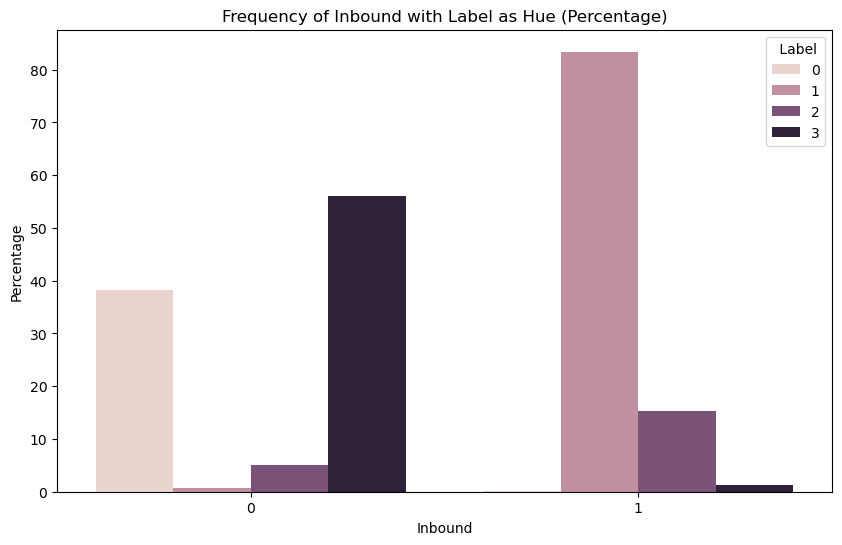

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is named 'df'
inbound_label_counts = balanced_data.groupby([' Inbound', ' Label']).size().reset_index(name='Count')
total_counts = balanced_data.groupby([' Inbound']).size().reset_index(name='Total_Count')

inbound_label_counts = inbound_label_counts.merge(total_counts, on=' Inbound')
inbound_label_counts['Percentage'] = (inbound_label_counts['Count'] / inbound_label_counts['Total_Count']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=inbound_label_counts, x=' Inbound', y='Percentage', hue=' Label')
plt.title('Frequency of Inbound with Label as Hue (Percentage)')
plt.xlabel('Inbound')
plt.ylabel('Percentage')
plt.show()


In [12]:
inbound_label_counts

,Inbound,Label,Count,Total_Count,Percentage
0,0,0,433,1133,38.217123
1,0,1,7,1133,0.617829
2,0,2,58,1133,5.119153
3,0,3,635,1133,56.045896
4,1,0,139,100740,0.137979
5,1,1,84019,100740,83.401826
6,1,2,15344,100740,15.231288
7,1,3,1238,100740,1.228906


In [13]:

# Split the data into train and test sets
X = balanced_data.drop([' Inbound',' Label'], axis=1)
y = balanced_data[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=42)



In [14]:
X_train.isnull().sum().sum()

1

In [15]:
import numpy as np

def check_data_issues(data):
    # Check for NaN values
    if data.isnull().values.any():
        print("There are NaN values in the dataset.")

    # Check for infinite values
    if np.isinf(data).values.any():
        print("There are infinite values in the dataset.")

    # Check for extremely large values
    max_value = data.max().max()
    if max_value > np.finfo(np.float64).max:
        print(f"There are values too large for dtype('float64') in the dataset. Max value: {max_value}")

    # Check for extremely small values
    min_value = data.min().min()
    if min_value < np.finfo(np.float64).min:
        print(f"There are values too small for dtype('float64') in the dataset. Min value: {min_value}")

# Check the training and testing data for any issues
check_data_issues(X_train)
check_data_issues(X_test)


There are NaN values in the dataset.
There are infinite values in the dataset.
There are values too large for dtype('float64') in the dataset. Max value: inf
There are infinite values in the dataset.
There are values too large for dtype('float64') in the dataset. Max value: inf


In [16]:
# Replace infinity values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the mean of the corresponding column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now, standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Create an empty DataFrame with the desired columns
model_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score"])

# Train and evaluate machine learning models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the metrics to the DataFrame
    model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)

    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 score: {f1}")
    print(classification_report(y_test, y_pred))
    print("\n")

# Display the comparison DataFrame
model_comparison

/tmp/ipykernel_8772/3989400141.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Logistic Regression:
Accuracy: 0.999378312937635
F1 score: 0.9993793519071973
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       171
           1       1.00      1.00      1.00     25208
           2       1.00      1.00      1.00      4621
           3       0.98      0.99      0.98       562

    accuracy                           1.00     30562
   macro avg       0.99      0.99      0.99     30562
weighted avg       1.00      1.00      1.00     30562





/tmp/ipykernel_8772/3989400141.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Random Forest:
Accuracy: 0.9996073555395589
F1 score: 0.9996087894922059
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       171
           1       1.00      1.00      1.00     25208
           2       1.00      1.00      1.00      4621
           3       0.99      0.99      0.99       562

    accuracy                           1.00     30562
   macro avg       0.99      1.00      0.99     30562
weighted avg       1.00      1.00      1.00     30562



Support Vector Machine:
Accuracy: 0.999149270335711
F1 score: 0.9991562785146126
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       171
           1       1.00      1.00      1.00     25208
           2       1.00      1.00      1.00      4621
           3       0.97      0.99      0.98       562

    accuracy                           1.00     30562
   macro avg       0.98      1.00      0.99     30562
weighted avg       1.00      

/tmp/ipykernel_8772/3989400141.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


,Model,Accuracy,F1 Score
0,Logistic Regression,0.999378,0.999379
1,Random Forest,0.999607,0.999609
2,Support Vector Machine,0.999149,0.999156


In [18]:
feature_columns = X.columns

# Get the Random Forest model from the 'models' dictionary
random_forest_model = models['Random Forest']

# Get feature importances
importances = random_forest_model.feature_importances_

# Create a DataFrame with the feature names and their corresponding importances
feature_importances = pd.DataFrame({'Feature': feature_columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances DataFrame
# Filter the DataFrame to show only features with non-zero importance
non_zero_importances = feature_importances[feature_importances['Importance'] > 0]

# Display the filtered DataFrame
non_zero_importances


,Feature,Importance
5,Timestamp,1.523385e-01
44,Max Packet Length,1.191067e-01
71,Init_Win_bytes_forward,1.007452e-01
52,ACK Flag Count,9.970727e-02
13,Fwd Packet Length Mean,8.021246e-02
...,...,...
79,Idle Mean,2.199928e-05
80,Idle Std,1.996111e-05
76,Active Std,1.148432e-05
77,Active Max,1.001874e-05


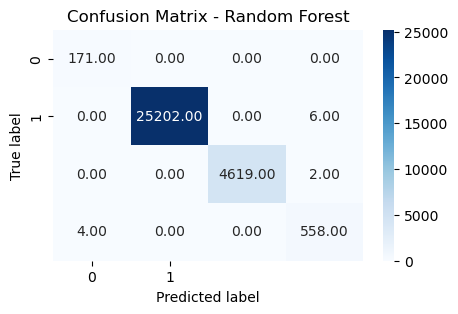

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Choose the model you want to use, for example, Random Forest
model = models["Random Forest"]
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix - Random Forest")
plt.show()
